# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
date = "2020/03/31"

In [4]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [5]:
print(len(master))
# master.head(5)

667


In [6]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [7]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to 37f60c95-36f5-4afb-95e7-9ee68f4b3b01
Data columns (total 9 columns):
distance            667 non-null float64
drive_time          667 non-null float64
month               667 non-null int64
price               667 non-null int64
cash                494 non-null float64
peak                494 non-null float64
pickup_datetime     667 non-null datetime64[ns]
drop_datetime       667 non-null datetime64[ns]
shop_position_id    667 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 52.1+ KB


In [9]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [10]:
# df.head(3)

## 毎日のデータ集計

In [11]:
target_day = datetime.datetime.strptime(date, "%Y/%m/%d").date()

# target_day = datetime.datetime(2020, 3, 21).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day].sort_values('pickup_datetime')

In [12]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
1678c212-aad9-439a-8467-e8b7baba4094,1.27,10.2,3,401,1402.0,0.0,2020-03-31 11:10:00,2020-03-31 11:32:00,35.58123016357422-139.64138793945312,2020-03-31,1,Tuesday,31,11,14
c39ee822-1e55-480b-9537-9b762ba04091,2.49,18.7,3,577,0.0,0.0,2020-03-31 11:27:00,2020-03-31 11:58:00,35.58118057250977-139.64141845703122,2020-03-31,1,Tuesday,31,11,14
aa9cf251-34b0-49ac-a712-7bf0bf628f3b,2.66,14.6,3,595,0.0,0.0,2020-03-31 12:00:00,2020-03-31 12:22:00,35.580322265625-139.66229248046878,2020-03-31,1,Tuesday,31,12,14
f45764a0-04ee-4697-afa0-d141325fa296,1.09,9.0,3,562,0.0,0.0,2020-03-31 12:16:00,2020-03-31 12:33:00,35.565460205078125-139.6507568359375,2020-03-31,1,Tuesday,31,12,14
cfe6fd97-e81f-4553-a59a-648d15cd0fa2,1.74,18.6,3,577,0.0,0.0,2020-03-31 12:32:00,2020-03-31 12:57:00,35.55374526977539-139.64529418945312,2020-03-31,1,Tuesday,31,12,14
3bdaee6a-6ba2-42d0-b8d8-d365030b0794,1.83,13.3,3,551,0.0,0.0,2020-03-31 12:57:00,2020-03-31 13:19:00,35.553009033203125-139.64590454101562,2020-03-31,1,Tuesday,31,12,14
87182853-5ae0-466c-ae18-67469f66fcf8,1.29,9.9,3,402,3829.0,0.0,2020-03-31 13:34:00,2020-03-31 13:52:00,35.56488800048828-139.6549072265625,2020-03-31,1,Tuesday,31,13,14
06cdcf50-9e6a-4096-b3d5-1e29bd521b33,2.30,13.3,3,456,0.0,0.0,2020-03-31 13:45:00,2020-03-31 14:07:00,35.56538391113281-139.65092468261722,2020-03-31,1,Tuesday,31,13,14
333380c3-8cf3-4562-892c-26369a716c79,1.46,11.7,3,411,1745.0,0.0,2020-03-31 14:07:00,2020-03-31 14:25:00,35.56867980957031-139.63697814941406,2020-03-31,1,Tuesday,31,14,14


In [13]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
short_count = len(df_day[df_day["distance"] < 1])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])
peak_sum = int(df_day[df_day["peak"] != 0].sum()["peak"])

In [14]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロング{}件, ショート{}件, ピーク{}件({}円), 現金{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, short_count, peak_count, peak_sum, cash_count))

2020-03-31  配達件数: 17件, 配達時間: 4.2h, 配達距離: 34.61km, 配達報酬: 8290円, ロング8件, ショート1件, ピーク1件(100円), 現金8件


## 日別の集計

In [15]:
groupby = df.groupby('date')

In [16]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_day["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [17]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月日,,,,,,,,,
2020-02-02,18,4.4,28.90,10321,4,7,10,9.1,6.60
2020-02-04,13,3.0,21.52,5484,4,0,3,8.4,7.18
2020-02-05,9,2.5,17.43,3932,2,0,5,8.7,6.94
2020-02-09,13,2.9,16.60,7726,3,1,1,10.4,5.75
2020-02-10,16,3.5,20.02,7385,2,3,5,10.5,5.74
2020-02-11,18,4.0,26.94,9580,4,6,7,9.0,6.70
2020-02-15,15,3.3,23.86,7116,3,1,1,8.3,7.23
2020-02-16,7,1.7,9.79,4388,1,3,3,10.4,5.75
2020-02-18,13,2.5,15.53,5394,0,0,7,9.6,6.24


## 週別の集計

In [18]:
groupby = df.groupby('week_of_month')

In [19]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_week["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [20]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
週番号,,,,,,,,,
1,26,6.5,40.66,12875,7,0,0,9.6,6.23
2,59,15.0,88.88,26269,13,0,0,10.1,5.93
3,42,10.4,67.94,20883,13,13,22,9.2,6.51
4,31,7.5,56.67,14836,11,5,19,8.0,7.52
5,51,13.2,87.63,26421,14,16,30,9.1,6.62
6,35,8.4,55.55,17142,9,1,9,9.1,6.62
7,56,12.5,80.61,28469,10,13,16,9.3,6.44
8,54,11.2,74.19,25641,4,8,23,9.1,6.61
9,52,11.9,78.87,28619,11,9,14,9.0,6.64


## 月別の集計

In [21]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_month["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_month["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [22]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月,,,,,,,,,
1,168,42.3,275.81,79884,48,24,56,9.2,6.52
2,212,48.0,312.48,108459,37,39,73,9.2,6.51
3,187,43.6,332.59,88425,65,19,59,7.9,7.63
12,100,33.1,169.77,48737,27,0,0,11.7,5.13


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

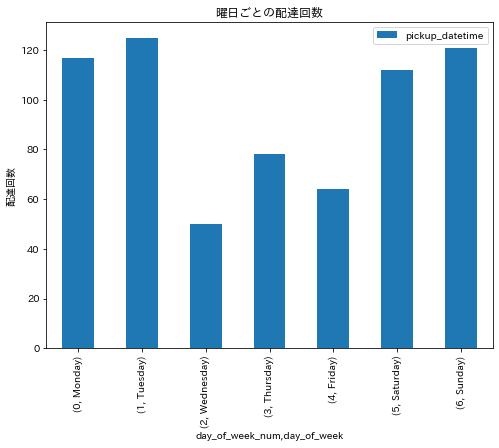

In [23]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

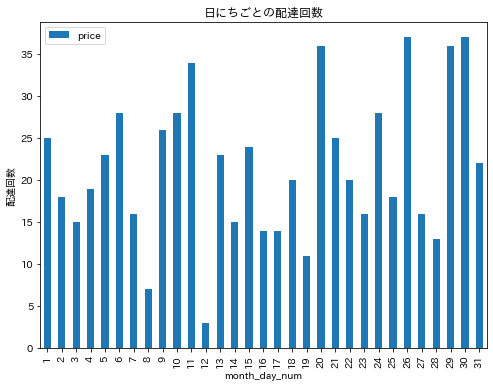

In [24]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

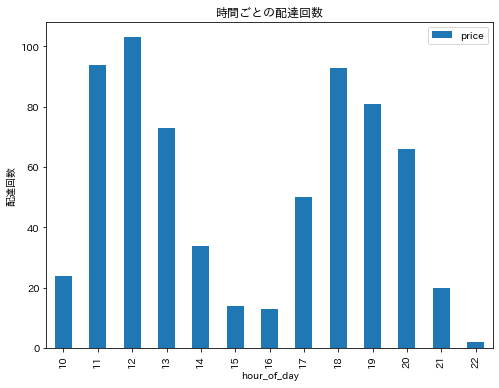

In [25]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

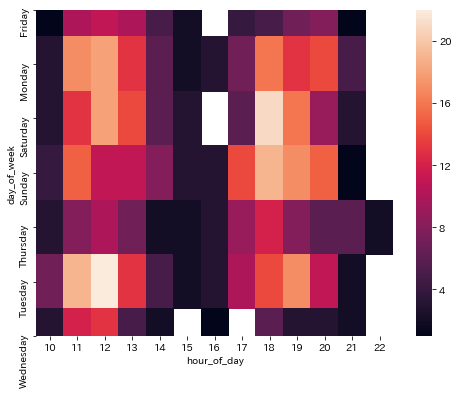

In [26]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)

1## 